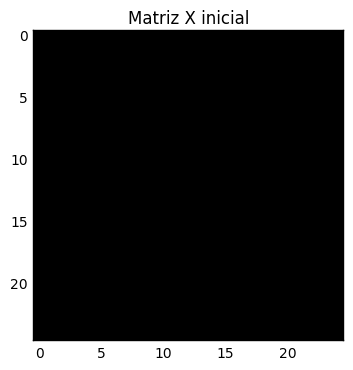

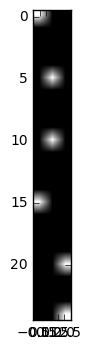

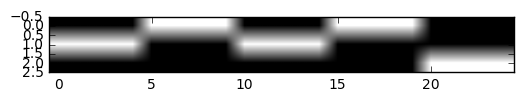

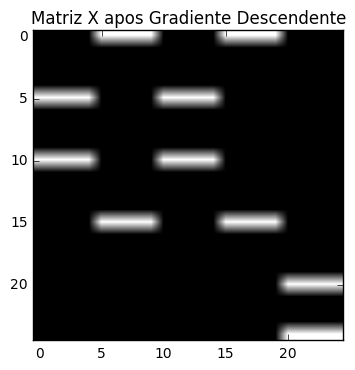

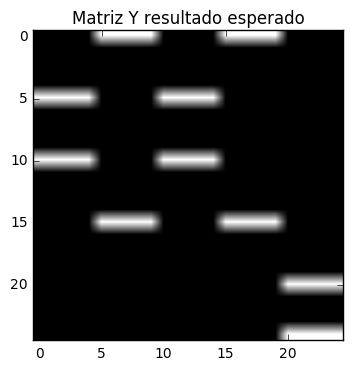

In [73]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import IPython
plt.rcParams['image.cmap'] = 'gray'
with open('test2.txt', 'rb') as data:
    #rows = reader(data, delimiter=',', quotechar='|')
    rows = reader(data, delimiter='\t', quotechar='|')
    x = []
    for row in rows:
        y = []
        for i in row:
            if i:
                y.append(i.replace(',','.'))
        x.append(y)
    x = np.array(x, dtype=float)
    Y = x
    
size = 4000
T = np.arange(size)
f1 = 440
f2 = 880
fs = 4000
x = np.ndarray((size*3))
x[:size] = np.sin(2*np.pi*f1*T/fs)
x[size:-size] = np.sin(2*np.pi*f2*T/fs)
x[-size:] = np.sin(2*np.pi*f1*T/fs)
IPython.display.display(IPython.display.Audio(x, rate=fs))
f, t, Y = spectrogram(x, fs)

Y = np.zeros((25,25))
Y[5, :5] = 1
Y[10, :5] = 1
Y[15, 5:10] = 1
Y[0, 5:10] = 1
Y[5, 10:15] = 1
Y[10, 10:15] = 1
Y[15, 15:20] = 1
Y[0, 15:20] = 1
Y[20, 20:] = 1
Y[24, 20:] = 1

M, N = Y.shape
K = 3
H = np.ones((M,K))*0.001
W = np.ones((K,N))*0.001

num_iters = 1500
alpha = 0.1
J_history = np.zeros((num_iters))

plt.imshow(np.dot(H,W))
plt.title('Matriz X inicial')
plt.show()


for iter in range(num_iters):
    X = np.dot(H,W)
    dif = Y-X
    J = np.dot(np.dot(dif,np.ones((N,1))).T,np.dot(dif,np.ones((N,1))))
    J_history[iter] = J
    temp = H.copy()
    H = H + ((alpha * np.dot(W,Y.T)) - (alpha * np.dot(np.dot(W,W.T),H.T))).T
    W = W + ((alpha * np.dot(temp.T,Y)) - (alpha * np.dot(np.dot(temp.T,temp),W)))
#print J_history[-1]
#plt.pcolormesh(t, f, np.dot(H,W), cmap='hot')
plt.imshow(H>np.percentile(H,93))
plt.show()
plt.imshow(W>np.percentile(W,60))
plt.show()
plt.imshow(np.round(np.dot(H,W),2))
plt.title('Matriz X apos Gradiente Descendente')
plt.show()
#plt.pcolormesh(t, f, Y, cmap='hot')
plt.imshow(np.round(Y,2))
plt.title('Matriz Y resultado esperado')
plt.show()

#plt.plot(range(num_iters), J_history)
#plt.show()

In [2]:
import subprocess
subprocess.call(['aplay', 'test.wav'])

0

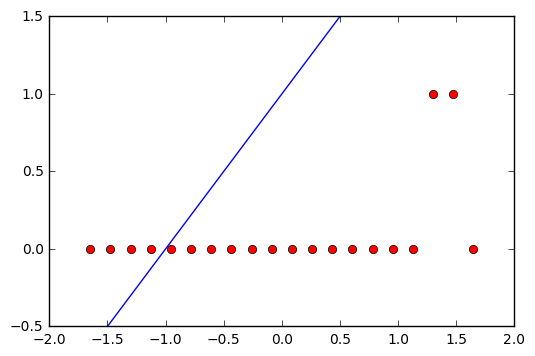

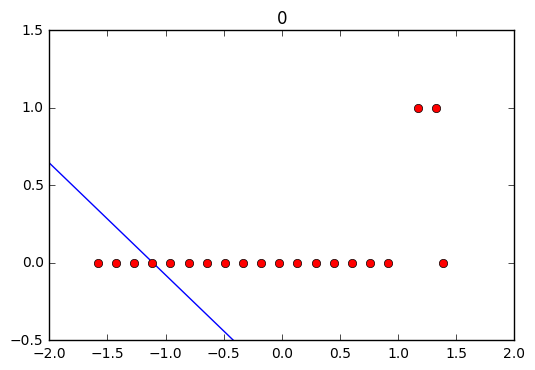

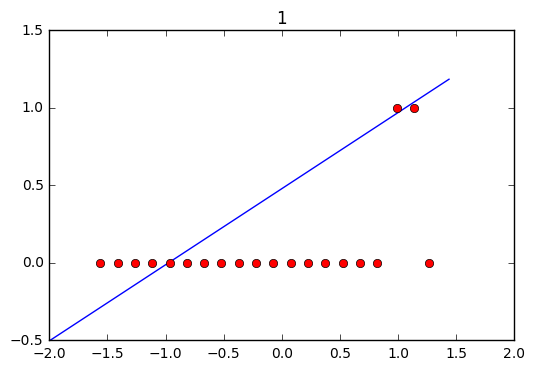

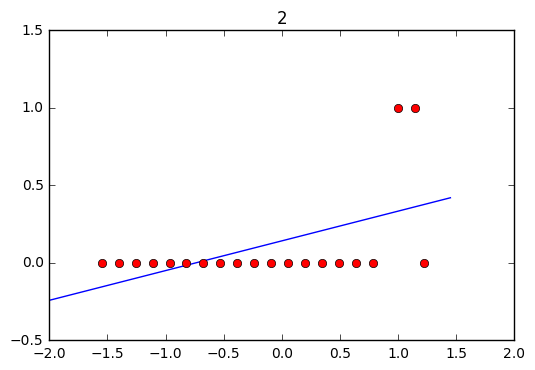

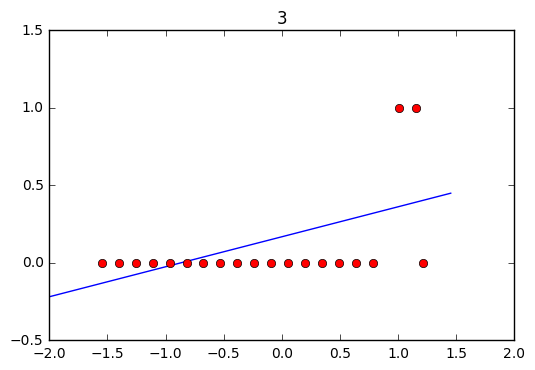

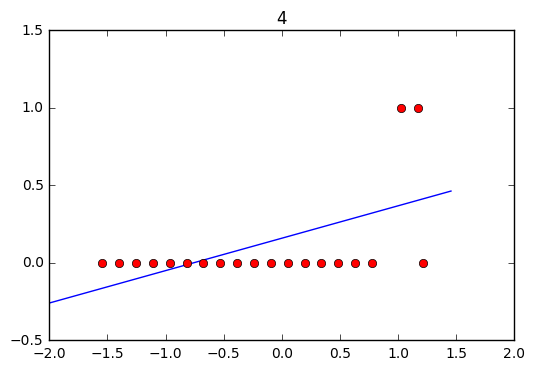

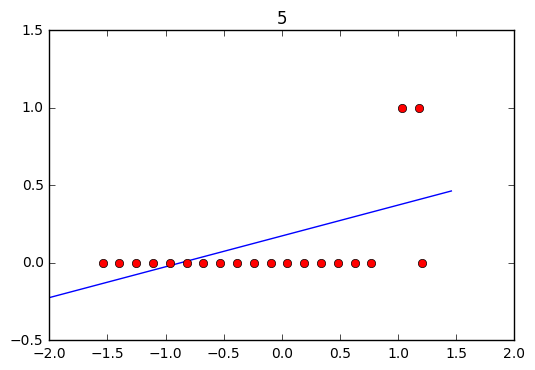

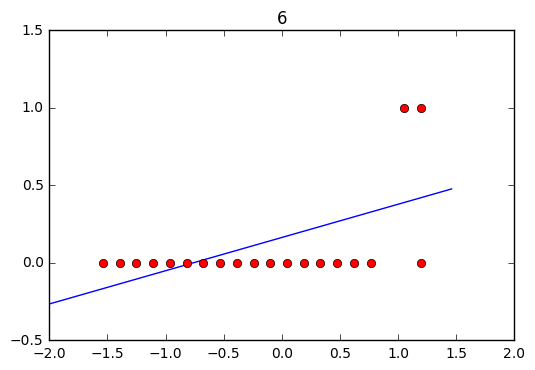

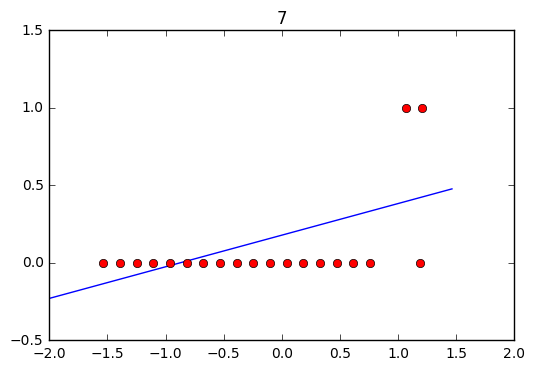

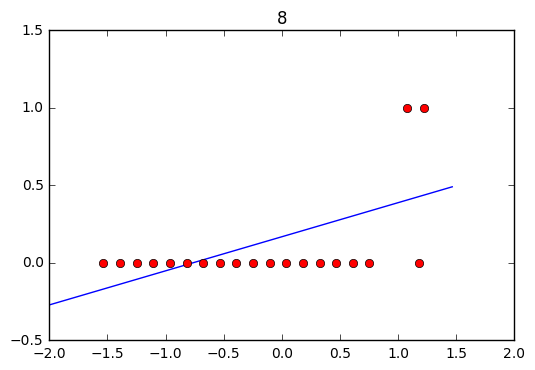

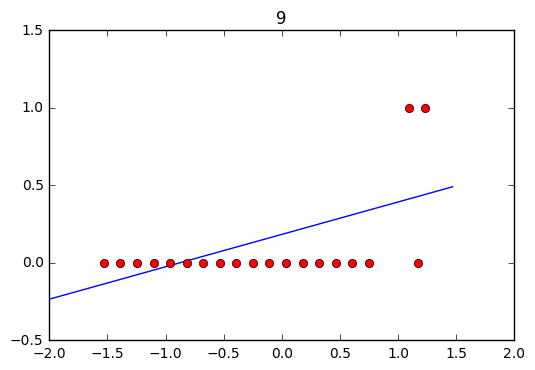

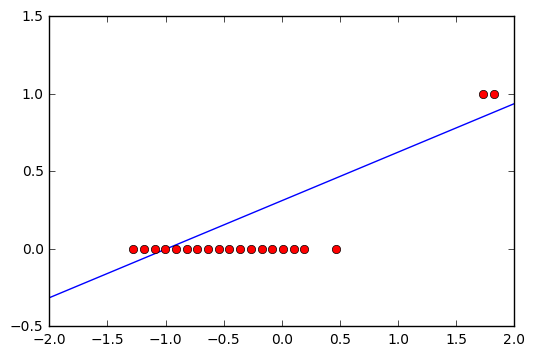

In [22]:
import numpy as np
import matplotlib.pyplot as plt

y = np.zeros((20,1))
y[17] = 1
y[18] = 1

M, N = y.shape
K = 2
X = np.arange(M*(K-1)).reshape((M,K-1))
theta = np.ones((K,N))

mu = X.mean(axis=0)
sigma = X.std(axis=0)
N = len(X[0,:])
M = len(y)
temp = (X-mu)/sigma
X = np.ones((M,N+1))
X[:,1:] = temp
Xbkp = X.copy()
ybkp = y.copy()
tbkp = theta.copy()

num_iters = 10
alpha = 0.1
J_history = np.zeros((num_iters))

t = np.arange(min(X[:,1]-1),max(X[:,1]+1))
h = theta[0]+t*theta[1]
plt.plot(t, h)
plt.plot(X[:,1:], y, 'ro')
plt.axis([-2, 2, -0.5, 1.5])
plt.show()


for iter in range(num_iters):
    h = np.zeros((M,1))
    h[:,0] = np.dot(X,theta)[:,0]
    J = np.dot((h-y).T,(h-y))/(2*M)
    J_history[iter] = J
    temp = X.copy()
    X = X + ((alpha * np.dot(theta,y.T)) - (alpha * np.dot(np.dot(theta,theta.T),X.T))).T
    theta = theta + ((alpha * np.dot(temp.T,y)) - (alpha * np.dot(np.dot(temp.T,temp),theta)))
    t = np.arange(min(X[:,1]-1),max(X[:,1]+1))
    h = theta[0]+t*theta[1]
    plt.plot(t, h)
    plt.plot(X[:,1:], y, 'ro')
    plt.title(iter)
    plt.axis([-2, 2, -0.5, 1.5])
    plt.show()

X = Xbkp
y = ybkp
theta = tbkp

num_iters = 100

for iter in range(num_iters):
    h = np.zeros((M,1))
    h[:,0] = np.dot(X,theta)[:,0]
    J = np.dot((h-y).T,(h-y))/(2*M)
    temp = X.copy()
    X = X + ((alpha * np.dot(theta,y.T)) - (alpha * np.dot(np.dot(theta,theta.T),X.T))).T
    theta = theta + ((alpha * np.dot(temp.T,y)) - (alpha * np.dot(np.dot(temp.T,temp),theta)))

t = np.arange(min(X[:,1]-1),max(X[:,1]+1))
h = theta[0]+t*theta[1]
plt.plot(t, h)
plt.plot(X[:,1:], y, 'ro')
plt.axis([-2, 2, -0.5, 1.5])
plt.show()

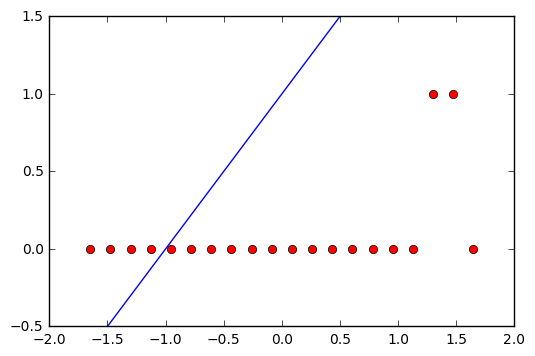

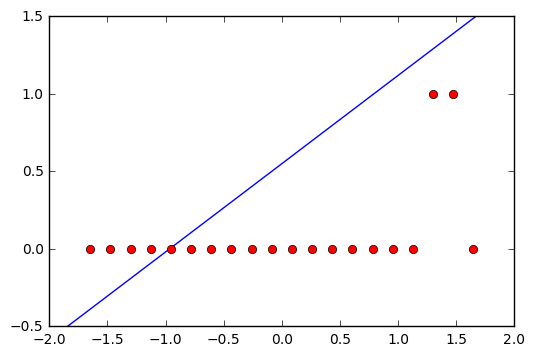

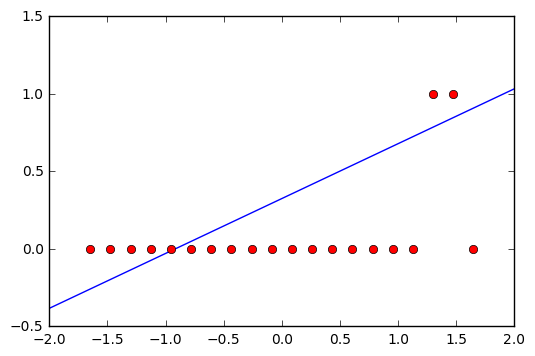

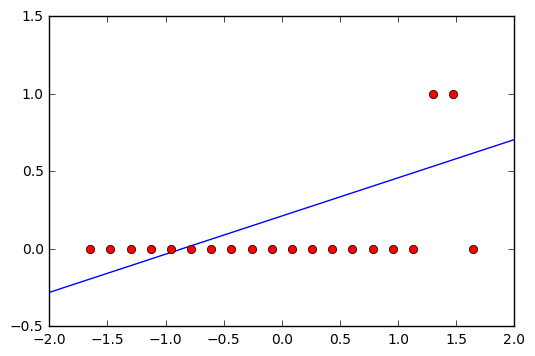

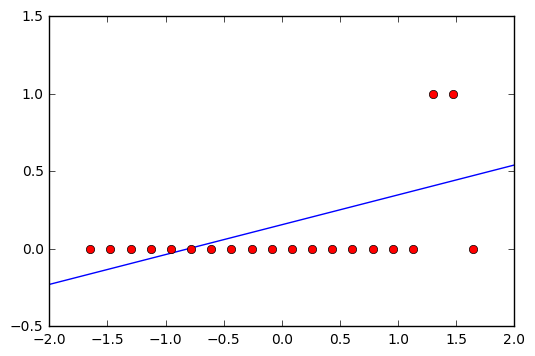

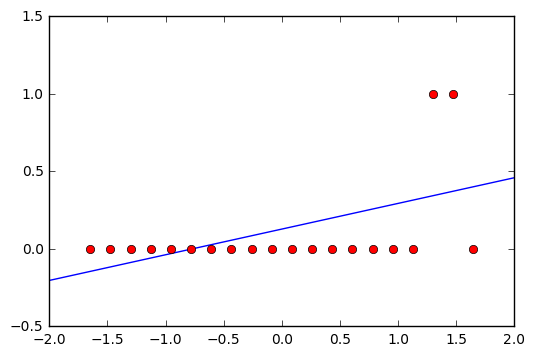

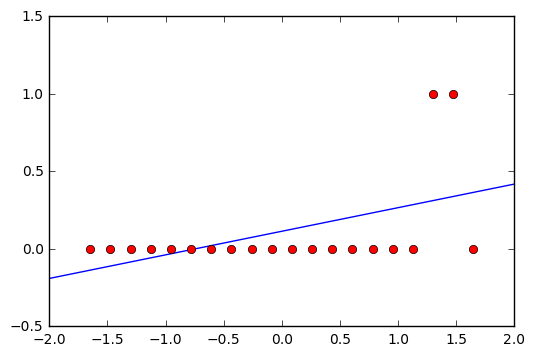

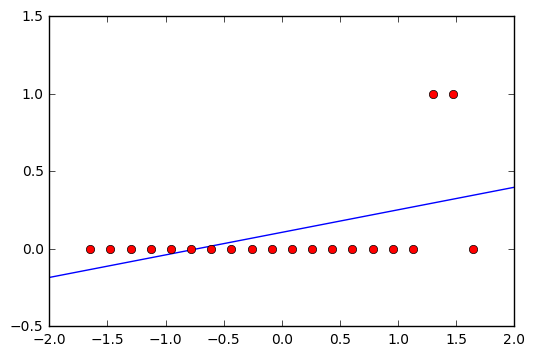

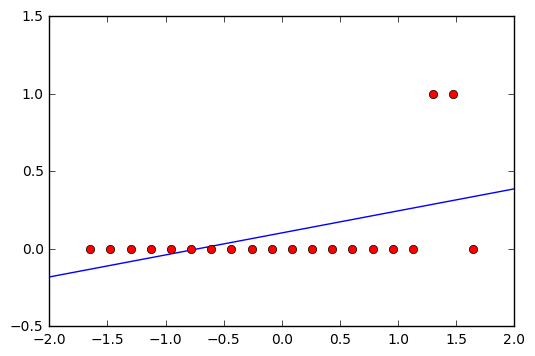

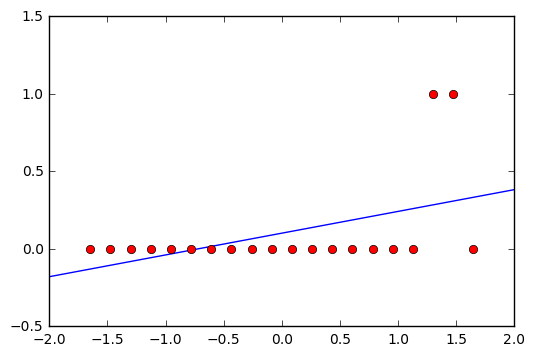

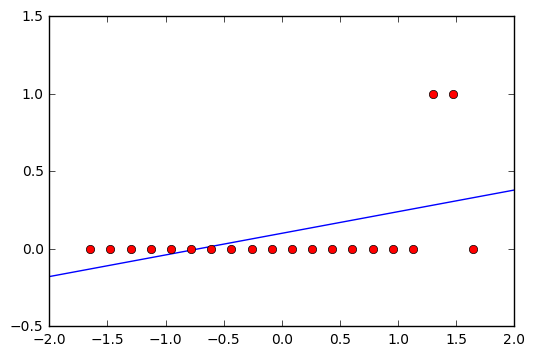

In [26]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
with open('test2.txt', 'rb') as data:
    #rows = reader(data, delimiter=',', quotechar='|')
    rows = reader(data, delimiter='\t', quotechar='|')
    x = []
    for row in rows:
        y = []
        for i in row:
            if i:
                y.append(i.replace(',','.'))
        x.append(y)
    x = np.array(x, dtype=float)
    X = x[:,:-1]
    y = x[:,-1][np.newaxis].T


mu = X.mean(axis=0)
sigma = X.std(axis=0)
N = len(X[0,:])
M = len(y)
temp = (X-mu)/sigma
X = np.ones((M,N+1))
X[:,1:] = temp
theta = np.zeros((X.shape[1],1))
X = Xbkp
y = ybkp
theta = tbkp
N = len(X[0,:])
M = len(y)

num_iters = 10
alpha = 0.5
J_history = np.zeros((num_iters))
t = np.arange(min(X[:,1]-1),max(X[:,1]+1))
h = theta[0]+t*theta[1]
plt.plot(t, h)
plt.plot(X[:,1:], y, 'ro')
plt.axis([-2, 2, -0.5, 1.5])
plt.show()
for iter in range(num_iters):
    h = np.zeros((M,1))
    h[:,0] = np.dot(X,theta)[:,0]
    J = np.dot((h-y).T,(h-y))/(2*M)
    J_history[iter] = J
    theta = theta - (alpha/M * np.dot((h-y).T,X)).T
    t = np.arange(min(X[:,1]-1),max(X[:,1]+1))
    h = theta[0]+t*theta[1]
    plt.plot(t, h)
    plt.plot(X[:,1:], y, 'ro')
    plt.axis([-2, 2, -0.5, 1.5])
    plt.show()

#plt.plot(range(num_iters), J_history)
#plt.show()


Fórmula encontrada: y = 0.251112263025 + 0.116062064252 * x


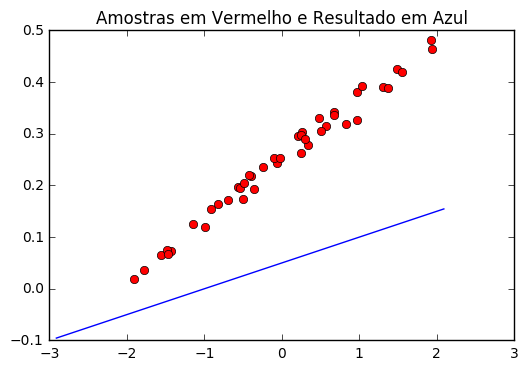

In [35]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
with open('test2.txt', 'rb') as data:
    #rows = reader(data, delimiter=',', quotechar='|')
    rows = reader(data, delimiter='\t', quotechar='|')
    x = []
    for row in rows:
        y = []
        for i in row:
            if i:
                y.append(i.replace(',','.'))
        x.append(y)
    x = np.array(x, dtype=float)
    X = x[:,:-1]
    y = x[:,-1][np.newaxis].T

mu = X.mean(axis=0)
sigma = X.std(axis=0)
N = len(X[0,:])
M = len(y)
temp = (X-mu)/sigma
X = np.ones((M,N+1))
X[:,1:] = temp

theta = np.ones((X.shape[1],1))*0.05

num_iters = 1000
alpha = 0.001
J_history = np.zeros((num_iters))
t = np.arange(min(X[:,1]-1),max(X[:,1]+1))
h = theta[0]+t*theta[1]
plt.plot(t, h)
plt.plot(X[:,1:], y, 'ro')
plt.title('Amostras em Vermelho e Resultado em Azul')
for iter in range(num_iters):
    h = np.zeros((M,1))
    h[:,0] = np.dot(X,theta)[:,0]
    J = np.dot((h-y).T,(h-y))/(2*M)
    J_history[iter] = J
    temp = X.copy()
    X = X + ((alpha * np.dot(theta,y.T)) - (alpha * np.dot(np.dot(theta,theta.T),X.T))).T
    theta = theta + ((alpha * np.dot(temp.T,y)) - (alpha * np.dot(np.dot(temp.T,temp),theta)))
    #t = np.arange(min(X[:,1]-1),max(X[:,1]+1))
    #h = theta[0]+t*theta[1]
    #plt.plot(t, h)


print 'Fórmula encontrada: y =', theta[0][0], '+', theta[1][0], '* x'
plt.show()

#plt.plot(range(num_iters), J_history)
#plt.show()
